# Neural Networks

In [1]:
import os

os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")  # Report only TF errors by default

'2'

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from scipy import stats

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.config.set_visible_devices([], 'GPU') #disables GPU

## Data

In [4]:

# Load the CSV file
data = pd.read_csv("filled.csv")

In [5]:
# Convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Remove any missing values
data = data.dropna()

# Set the date column as the index of the DataFrame
data = data.set_index('date')

In [6]:
seed = 42

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, data.BC, test_size=0.15, random_state=seed, shuffle=True)
x_train = x_train.drop(columns=['BC'])
x_test = x_test.drop(columns=['BC'])

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3896, 12), (688, 12), (3896,), (688,))

In [10]:
# TODO: split, preprocess, make sequences

In [11]:
data

,BC,N_CPC,PM-10,PM-2.5,PM-1.0,NO2,O3,SO2,CO,NO,NOX,TEMP,HUM
date,,,,,,,,,,,,,
2019-01-01 00:00:00,3.445,17.773,13.033,11.767,11.050,18.0,41.0,1.0,0.2,4.0,23.0,12.140,53.780
2019-01-01 01:00:00,5.162,24.620,17.050,15.533,14.783,62.0,1.0,1.0,0.2,22.0,96.0,11.683,55.100
2019-01-01 02:00:00,2.951,17.700,11.417,10.367,9.850,68.0,1.0,1.0,0.2,42.0,132.0,11.683,53.433
2019-01-01 03:00:00,1.917,12.212,7.750,7.100,6.683,75.0,1.0,1.0,0.2,66.0,176.0,11.367,54.533
2019-01-01 04:00:00,2.462,11.178,8.317,7.650,7.167,63.0,1.0,1.0,0.2,27.0,103.0,10.867,57.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-10 19:00:00,0.728,9.275,7.300,5.267,3.267,30.0,57.0,1.0,0.2,2.0,33.0,22.033,93.367
2019-12-10 20:00:00,0.787,9.420,7.500,5.467,3.417,37.0,46.0,1.0,0.2,1.0,38.0,22.100,93.317
2019-12-10 21:00:00,1.056,9.296,7.233,5.283,3.200,16.0,67.0,1.0,0.2,1.0,17.0,22.200,93.333


In [12]:
type(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4584 entries, 2019-01-01 00:00:00 to 2019-12-10 23:00:00
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BC      4584 non-null   float64
 1   N_CPC   4584 non-null   float64
 2   PM-10   4584 non-null   float64
 3   PM-2.5  4584 non-null   float64
 4   PM-1.0  4584 non-null   float64
 5   NO2     4584 non-null   float64
 6   O3      4584 non-null   float64
 7   SO2     4584 non-null   float64
 8   CO      4584 non-null   float64
 9   NO      4584 non-null   float64
 10  NOX     4584 non-null   float64
 11  TEMP    4584 non-null   float64
 12  HUM     4584 non-null   float64
dtypes: float64(13)
memory usage: 501.4 KB


In [13]:
data.isna().sum() # check for missing values

BC        0
N_CPC     0
PM-10     0
PM-2.5    0
PM-1.0    0
NO2       0
O3        0
SO2       0
CO        0
NO        0
NOX       0
TEMP      0
HUM       0
dtype: int64

(4284, 13) (300, 13)


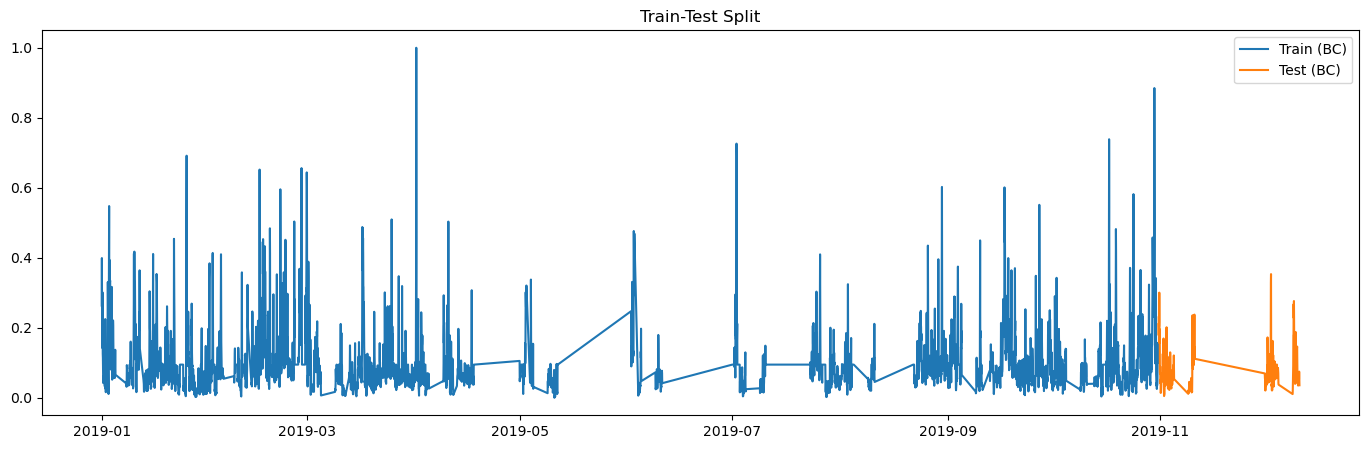

In [14]:
test_size = 24*25
X_train_raw = data.iloc[:-test_size]
# y_train_raw = y.iloc[:-test_size]
X_test_raw = data.iloc[-test_size:]
# y_test_raw = y.iloc[-test_size:]
print(X_train_raw.shape, X_test_raw.shape)

# Normalize both features and labels
X_min = X_train_raw.min()
X_max = X_train_raw.max()

X_train_raw = (X_train_raw-X_min)/(X_max-X_min)
X_test_raw = (X_test_raw-X_min)/(X_max-X_min)

plt.figure(figsize=(17,5))
plt.plot(X_train_raw.BC, label='Train (BC)')
plt.plot(X_test_raw.BC, label='Test (BC)')
plt.title('Train-Test Split')
plt.legend()
plt.show()

In [15]:
x_train.shape, y_train.shape

((3896, 12), (3896,))

## Neural Network (non-LSTM)

In [16]:
HIDDEN_DIM = 512
inputs = tf.keras.layers.Input(shape=[x_train.shape[-1]])

layer = keras.layers.Dense(HIDDEN_DIM, activation='relu')(inputs)
layer = keras.layers.Dropout(0.4)(layer)
layer = keras.layers.Dense(HIDDEN_DIM//2, activation='relu')(layer)
layer = keras.layers.Dropout(0.4)(layer)
layer = keras.layers.Dense(HIDDEN_DIM//3, activation='relu')(layer)
layer = keras.layers.Dropout(0.4)(layer)
predictions = keras.layers.Dense(1, activation='linear')(layer)

model = tf.keras.Model(inputs=inputs, outputs=predictions)
model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
            loss=tf.losses.mean_squared_error,
            metrics=[tf.metrics.mean_squared_error],
        )



In [17]:
batch_size = 64
epochs = 2000
logs = model.fit(
    x_train, y_train,
    batch_size=batch_size, epochs=epochs,
    validation_split=.1,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=50,  restore_best_weights=True)
                            ],
)

Epoch 1/2000
55/55 [==============================] - 0s 3ms/step - loss: 0.8590 - mean_squared_error: 0.8590 - val_loss: 0.8819 - val_mean_squared_error: 0.8819
Epoch 2/2000
55/55 [==============================] - 0s 2ms/step - loss: 0.5115 - mean_squared_error: 0.5115 - val_loss: 0.6604 - val_mean_squared_error: 0.6604
Epoch 3/2000
55/55 [==============================] - 0s 2ms/step - loss: 0.4681 - mean_squared_error: 0.4681 - val_loss: 0.6091 - val_mean_squared_error: 0.6091
Epoch 4/2000
55/55 [==============================] - 0s 2ms/step - loss: 0.4255 - mean_squared_error: 0.4255 - val_loss: 0.7434 - val_mean_squared_error: 0.7434
Epoch 5/2000
55/55 [==============================] - 0s 2ms/step - loss: 0.4185 - mean_squared_error: 0.4185 - val_loss: 0.5576 - val_mean_squared_error: 0.5576
Epoch 6/2000
55/55 [==============================] - 0s 2ms/step - loss: 0.3774 - mean_squared_error: 0.3774 - val_loss: 0.6330 - val_mean_squared_error: 0.6330
Epoch 7/2000
55/55 [========

## LSTM

In [25]:
test_size = 24*30 #the number of days is 191

train = data.iloc[:-test_size]
# y_train_raw = y.iloc[:-test_size]
test = data.iloc[-test_size:]
# y_test_raw = y.iloc[-test_size:]
print(train.shape, test.shape)

def build_sequences(df, target_labels=['BC'], window=200, stride=200):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    temp_df = df.drop(target_labels, axis=1).copy().values
    temp_label = df[target_labels].copy().values
    padding_len = len(df) % window
    
    if padding_len != 0:
        # Compute padding length
        padding_len = window - len(df) % window
        padding = np.zeros((padding_len, temp_df.shape[1]), dtype='float32')
        temp_df = np.concatenate((padding, temp_df))
        padding = np.zeros((padding_len,1), dtype='float32')
        #padding = np.zeros((padding_len, temp_label.shape[1]), dtype='float32')
        temp_label = np.concatenate((padding, temp_label))
        assert len(temp_df) % window == 0

    # Build sequences and labels
    for i in range(0, len(temp_df) - window + 1, stride):
        dataset.append(temp_df[i:i + window])
        labels.append(temp_label[i:i + window])

    return np.array(dataset), np.array(labels)

X_train, y_train = build_sequences(train, window=24, stride=24)
X_test, y_test = build_sequences(test, window=24, stride=24)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(3864, 13) (720, 13)


((161, 24, 12), (161, 24, 1), (30, 24, 12), (30, 24, 1))

import numpy as np

window = 12
stride = 12
target_labels = 'BC'

def build_sequences(df, target_labels=['BC'], window=200, stride=200):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    labels = []
    temp_df = df.copy().values
    temp_label = df[target_labels].copy().values
    padding_len = len(df) % window
    
    if padding_len != 0:
        # Compute padding length
        padding_len = window - len(df) % window
        padding = np.zeros((padding_len, temp_df.shape[1]), dtype='float32')
        temp_df = np.concatenate((padding, temp_df))
        padding = np.zeros((padding_len,), dtype='float32')
        #padding = np.zeros((padding_len, temp_label.shape[1]), dtype='float32')
        temp_label = np.concatenate((padding, temp_label))
        assert len(temp_df) % window == 0

    # Build sequences and labels
    for i in range(0, len(temp_df) - window + 1, stride):
        dataset.append(temp_df[i:i + window])
        labels.append(temp_label[i:i + window])

    return np.array(dataset), np.array(labels)

X_train, y_train = build_sequences(data, target_labels, window, stride)
X_test, y_test = build_sequences(data, target_labels, window, stride)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [31]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1:]
batch_size = 16
epochs = 200

input_shape, output_shape

((24, 12), (24, 1))

In [32]:
import tensorflow.keras.layers as tfkl
import tensorflow.keras as tfk

In [33]:
def build_LSTM_classifier(input_shape):
    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    lstm = tfkl.LSTM(128, return_sequences=True)(input_layer)
    lstm = tfkl.LSTM(128)(lstm)
    dropout = tfkl.Dropout(.5, seed=seed)(lstm)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(1)(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.MeanSquaredError(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [34]:
model = build_LSTM_classifier(input_shape)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 24, 12)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 24, 128)           72192     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 220,417
Trainable params: 220,417
Non-trainable

In [35]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
9/9 [==============================] - 2s 60ms/step - loss: 1.4738 - accuracy: 0.0000e+00 - val_loss: 0.6295 - val_accuracy: 0.0025 - lr: 0.0010
Epoch 2/200
9/9 [==============================] - 0s 21ms/step - loss: 1.1294 - accuracy: 0.0000e+00 - val_loss: 0.5960 - val_accuracy: 0.0025 - lr: 0.0010
Epoch 3/200
9/9 [==============================] - 0s 21ms/step - loss: 1.0385 - accuracy: 0.0000e+00 - val_loss: 0.5293 - val_accuracy: 0.0025 - lr: 0.0010
Epoch 4/200
9/9 [==============================] - 0s 21ms/step - loss: 0.9972 - accuracy: 0.0000e+00 - val_loss: 0.5226 - val_accuracy: 0.0025 - lr: 0.0010
Epoch 5/200
9/9 [==============================] - 0s 22ms/step - loss: 0.9527 - accuracy: 0.0000e+00 - val_loss: 0.4851 - val_accuracy: 0.0025 - lr: 0.0010
Epoch 6/200
9/9 [==============================] - 0s 22ms/step - loss: 0.9485 - accuracy: 0.0000e+00 - val_loss: 0.5362 - val_accuracy: 0.0025 - lr: 0.0010
Epoch 7/200
9/9 [==============================] - 0s 20ms

In [25]:
def build_CONV_LSTM_model(input_shape, output_shape):
    # Build the neural network layer by layer
    input_layer = tf.keras.layers.Input(shape=input_shape, name='input_layer')
    x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True, name='lstm'), name='bidirectional_lstm')(input_layer)
    x = tf.keras.layers.Conv1D(128, 3, padding='same', activation='relu', name='conv')(x)
    if output_shape[0] == 1:
        output_layer = tf.keras.layers.Conv1D(output_shape[1], 3, padding='same', activation='sigmoid', name='output_layer')(x)
        output_layer = tf.keras.layers.GlobalAveragePooling1D(keepdims=True, name='gap')(output_layer)
    else:
        output_layer = tf.keras.layers.Conv1D(output_shape[1], 3, padding='same', activation='sigmoid', name='output_layer')(x)
        crop_size = (output_layer.shape[1]-output_shape[0])//2
        output_layer = tf.keras.layers.Cropping1D((crop_size,crop_size), name='cropping')(output_layer)

    # Connect input and output through the Model class
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

    # Return the model
    return model

In [26]:
model = build_CONV_LSTM_model(input_shape, output_shape)
model.summary()
tf.keras.utils.plot_model(model, expand_nested=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 24, 13)]          0         
                                                                 
 bidirectional_lstm (Bidirec  (None, 24, 128)          39936     
 tional)                                                         
                                                                 
 conv (Conv1D)               (None, 24, 128)           49280     
                                                                 
 output_layer (Conv1D)       (None, 24, 1)             385       
                                                                 
 cropping (Cropping1D)       (None, 24, 1)             0         
                                                                 
Total params: 89,601
Trainable params: 89,601
Non-trainable params: 0
_________________________________________________________

In [27]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=10, factor=0.1, min_lr=1e-5)
    ]
).history

Epoch 1/200
3/3 [==============================] - 2s 161ms/step - loss: 1.7184 - mae: 0.7816 - val_loss: 0.5908 - val_mae: 0.4644 - lr: 0.0010
Epoch 2/200
3/3 [==============================] - 0s 18ms/step - loss: 1.3577 - mae: 0.6472 - val_loss: 0.5505 - val_mae: 0.4679 - lr: 0.0010
Epoch 3/200
3/3 [==============================] - 0s 20ms/step - loss: 1.3012 - mae: 0.6387 - val_loss: 0.5478 - val_mae: 0.4740 - lr: 0.0010
Epoch 4/200
3/3 [==============================] - 0s 27ms/step - loss: 1.2926 - mae: 0.6402 - val_loss: 0.5483 - val_mae: 0.4765 - lr: 0.0010
Epoch 5/200
3/3 [==============================] - 0s 20ms/step - loss: 1.2905 - mae: 0.6410 - val_loss: 0.5485 - val_mae: 0.4773 - lr: 0.0010
Epoch 6/200
3/3 [==============================] - 0s 23ms/step - loss: 1.2901 - mae: 0.6413 - val_loss: 0.5483 - val_mae: 0.4772 - lr: 0.0010
Epoch 7/200
3/3 [==============================] - 0s 18ms/step - loss: 1.2895 - mae: 0.6410 - val_loss: 0.5475 - val_mae: 0.4761 - lr: 0.001

In [28]:
x_train.shape

(3896, 12)

In [29]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split=.1,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=10, factor=0.1, min_lr=1e-5)
    ]
).history

ValueError: Data cardinality is ambiguous:
  x sizes: 3506
  y sizes: 161
Make sure all arrays contain the same number of samples.

## LSTM1

In [ ]:
SEQUENCE_LENGTH = 12
SEQUENCE_DIM = x_train.shape[-1]
RNN_CELL_DIM = 8
HIDDEN_DIM = 8
sequences = tf.keras.layers.Input(shape=[SEQUENCE_LENGTH, SEQUENCE_DIM])

layer = keras.layers.LSTM(RNN_CELL_DIM, return_sequences=True)(sequences)

layer = keras.layers.Dense(HIDDEN_DIM, activation='relu')(layer)

predictions = keras.layers.Dense(1, activation=None)(layer)

model = tf.keras.Model(inputs=sequences, outputs=predictions)
model.compile(
            optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-3),
            loss=tf.losses.mean_squared_error,
            metrics=[tf.metrics.mean_squared_error],
        )
